Select an option
1.- Kolmogorov-Smirnov
2.- Rachas
3.- Chi-cuadrado
Option: 1
Select the generator
1.- RANDU
2.- Sinclair ZX81
3.- Numerical Recipes
4.- Borland C/C++
Option: 2
Amount of numbers to generate n: 100


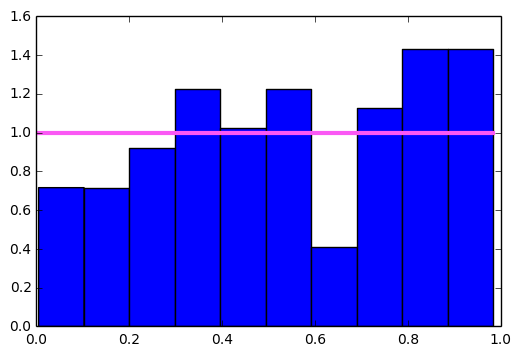

KS statistic =  0.225969240692
Not Uniform. Da:  0.136
a:  0.05


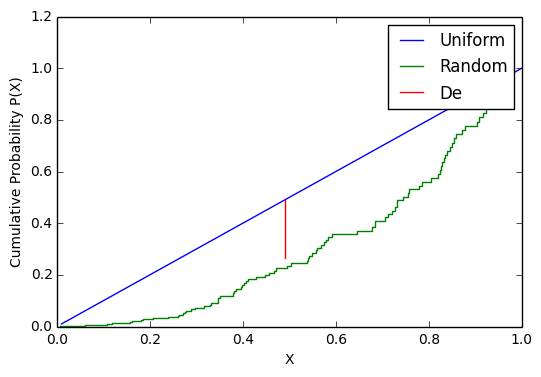

In [11]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time


def kolmogorov(x):
    
    # Teoretical CDF for Uniform distribution F(x)
    n = len(x)
    u = [1.0] * n
    
    # Graficar distribucion empirirca f(x)
    count, bins, ignored = plt.hist(x, 10, normed=True)
    plt.plot(bins, np.ones_like(bins), linewidth=3, color = '#FA58F4')
    plt.show()
    # Generamos la distribucion acumulada de una distribucion uniforme con parametros 0 y 1, para n valores.
    x1 = np.arange(1/(n+0.0),1+1/(n+0.0),1/(n+0.0))
    y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))
    #Generamos distribucion acumulada del generador que estamos evaluando para N valores.
    x2 = np.sort(x)
    y2 = np.cumsum(np.sort(x)/np.max(np.cumsum(x)))

    De=np.absolute(y2-y1)
    print "KS statistic = ",np.max(De)
    
    # Plotting
    plt.plot(x1,y1,label='Uniform')
    plt.step(x2,y2,label='Random')
    x3 = [x1[De.argmax()],x1[De.argmax()]]
    y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
    plt.step(x3,y3,label='De')
    
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Cumulative Probability P(X)')
    Da = (1.36/(n**0.5)+0.0)
    if np.max(De)< Da:
        print 'Uniform, KS statistic: ',np.max(De),' less than Da: ',Da
    else:
        print 'Not Uniform. Da: ',Da
    print 'a: ',(0.05)
        
    
def rachas(x):
    
    #Test de rachas
    n = len(x)
    creciente = True
    rachasCrecientes = 0
    rachasDecrecientes = 0
    for i in range(len(x)):
        if(i == 0):
            if(x[i]<x[i+1]):
                creciente = True
                rachasCrecientes += 1
            else:
                creciente = False
                rachasDecrecientes += 1
        else:
            if(creciente == True):
                if(x[i]<x[i-1]):
                    rachasDecrecientes += 1
                    creciente = False
            else:
                if(x[i]>x[i-1]):
                    rachasCrecientes += 1
                    creciente = True
                    
    R = rachasCrecientes + rachasDecrecientes
    print 'Rachas Crecientes: ',rachasCrecientes
    print 'Rachas Decrecientes: ',rachasDecrecientes
    print 'Total de Rachas R: ',R
    
    #Z statistic
    Z = (R-(2*n-1)/3)/((16*n-29)/90)**0.5
    print'a: ',(0.05)
    if(abs(Z) < 0.50978):
        print'Generator is random. Z statistic: ',Z
    else:
        print 'Generator is not random. Z statistic: ',Z
                    
def chicuadrado(x): 
    n = len(x)
    k = 20
    fi, clases, nothing = plt.hist(x, k)
    ei = np.ones_like(clases)*(n/k)

    plt.plot(clases, ei, linewidth=3, color = '#FA58F4')
    plt.show()
    chi2 = 0
    ei = n/k
    for i in fi:
        chi2 += (i-ei)**2
    #print chi2
    if chi2<=31.41:
        print 'Generator is uniform. Statistic x2: ',chi2
        print 'a: ',(0.05)
    else:
        print 'Generator is not uniform. Statistic x2: ',chi2

def congruencial(a, b, m, x0, n):
    randoms = []
    for i in range(n):
        xn = float((a * x0 + b) % m)
        x0 = xn
        random = float(xn/m)
        randoms.append(random)
    return randoms
        
def randu(n):
    return congruencial(65539, 0, 2**31, 5, n)

def sinclair(n):
    return congruencial(75, 0, 2**16 + 1, 5, n)

def numericalRecipes(n):
    return congruencial(1664525, 1013904223, 2**32, 5, n)

def borland(n):
    return congruencial(22695477, 0, 2**32, 5, n)
    
def main():
    
    print("Select an option\n1.- Kolmogorov-Smirnov\n2.- Rachas\n3.- Chi-cuadrado")
    opt = raw_input("Option: ")
    
    print("Select the generator\n1.- RANDU\n2.- Sinclair ZX81\n3.- Numerical Recipes\n4.- Borland C/C++")
    optGen = raw_input("Option: ")    
    n = int(raw_input("Amount of numbers to generate n: "))
    
    generators = { '1': randu, '2': sinclair, '3': numericalRecipes, '4': borland}
    x = generators[optGen](n)
    tests = { '1': kolmogorov, '2': rachas, '3': chicuadrado}
    tests[opt](x)

    
main()